In [1]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv") 
df.head() 

,Name,Age,Income
0,A,27,70000
1,B,29,90000
2,C,29,62000
3,D,28,60000
4,E,42,150000


In [5]:

import pandas as pd

# Check column names
print(df.columns)

# Verify if 'Income($)' exists
if 'Income($)' in df.columns:
    plt.scatter(df.Age, df['Income($)'])
    plt.xlabel('Age')
    plt.ylabel('Income($)')
    plt.show()
else:
    print("The column 'Income($)' does not exist in the dataframe.")

Index(['Name', 'Age', 'Income'], dtype='object')
The column 'Income($)' does not exist in the dataframe.


In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = y_predicted
df.head()


,Name,Age,Income,cluster
0,A,27,70000,2
1,B,29,90000,2
2,C,29,62000,0
3,D,28,60000,0
4,E,42,150000,1


In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])
cluster_centers = km.cluster_centers_
print(cluster_centers)

[[3.40000000e+01 8.05000000e+04]
 [3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.62272727e+04]]


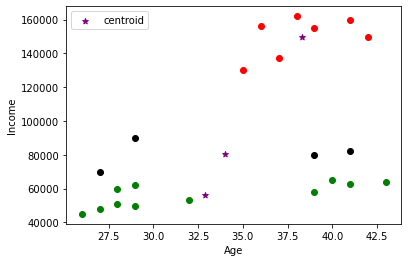

In [10]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1.Age, df1['Income'], color='green')
plt.scatter(df2.Age, df2['Income'], color='red')
plt.scatter(df3.Age, df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [11]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [12]:
df.head() 

,Name,Age,Income
0,A,27,70000
1,B,29,90000
2,C,29,62000
3,D,28,60000
4,E,42,150000


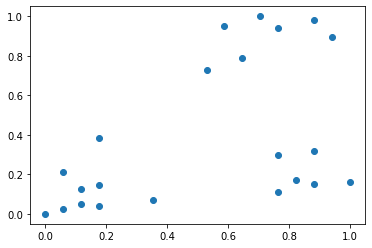

In [12]:
plt.scatter(df.Age, df['Income'])

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])

print(y_predicted)


[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [17]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,A,0.058824,0.213675,1
1,B,0.176471,0.384615,1
2,C,0.176471,0.145299,1
3,D,0.117647,0.128205,1
4,E,0.941176,0.897436,0


In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])

cluster_centers = km.cluster_centers_
print(cluster_centers)

[[0.85294118 0.2022792 ]
 [0.1372549  0.11728395]
 [0.72268908 0.8974359 ]]


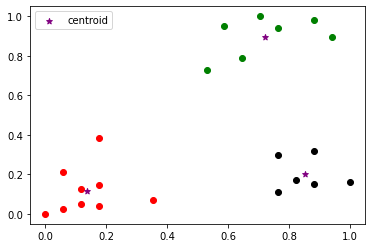

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income']])

df1 = df[y_predicted == 0]
df2 = df[y_predicted == 1]
df3 = df[y_predicted == 2]

plt.scatter(df1['Age'], df1['Income'], color='green')
plt.scatter(df2['Age'], df2['Income'], color='red')
plt.scatter(df3['Age'], df3['Income'], color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.legend()
plt.show()

In [26]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

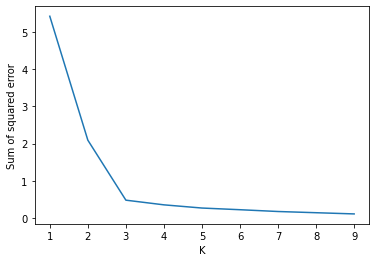

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error') 
plt.plot(k_rng,sse) 